## Data Exploration

In this notebook, we are going to take a closer look at the data. Let us begin by loading in the annotations.

In [1]:
import librosa
import pandas as pd
import numpy as np
from IPython.lib.display import Audio
from matplotlib import pyplot as plt
import multiprocessing
import scipy.signal
from scipy import signal

anno = pd.read_csv('data/annotations.csv')

In [2]:
anno.head()

,path,species
0,Clymene_Dolphin/83006002.wav,Clymene_Dolphin
1,Clymene_Dolphin/8300602E.wav,Clymene_Dolphin
2,Clymene_Dolphin/8300604P.wav,Clymene_Dolphin
3,Clymene_Dolphin/83006031.wav,Clymene_Dolphin
4,Clymene_Dolphin/83006022.wav,Clymene_Dolphin


The `annotations` dataframe contains the name of the species appearing in the sample as well as a path to the audio file.

This dataset contains 1697 recordings across 32 species.

In [3]:
anno.shape, anno.species.nunique()

((1697, 2), 32)

Audio files are grouped by species into subdirectories.

In [4]:
durations, SRs = [], []
for idx, row in anno.iterrows():
    y, sr = librosa.load(f'data/{row.path}', sr=None)
    SRs.append(sr)
    durations.append(y.shape[0] / sr)

The audio files have been recorded with varying sample rates.

In [5]:
set(SRs)

{600,
 640,
 1280,
 5000,
 5120,
 8000,
 10000,
 10200,
 10240,
 14900,
 16000,
 18000,
 20000,
 20480,
 21900,
 30000,
 40000,
 40960,
 41600,
 42100,
 43900,
 44100,
 55500,
 60600,
 80000,
 81600,
 81920,
 148100,
 160000,
 166600}

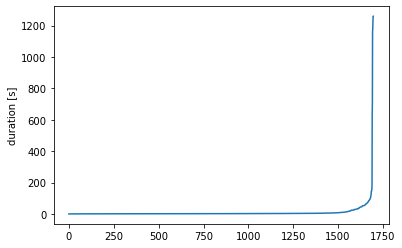

In [6]:
plt.plot(sorted(durations))
plt.ylabel('duration [s]');

Out of 1697 recordings, only 43 are longer than a minute.

In [7]:
np.sum(np.array(durations) > 60)

43

Let's take a look at the distribution of these shorter recordings.

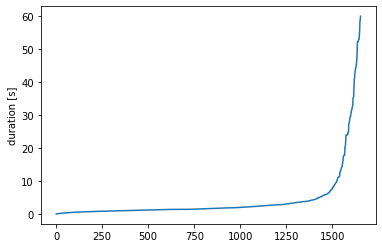

In [28]:
plt.plot(sorted(durations)[:-43])
plt.ylabel('duration [s]');

Majority of the recordings are short, on the order of seconds.

Let's visualize an example of a recording of each of the species.

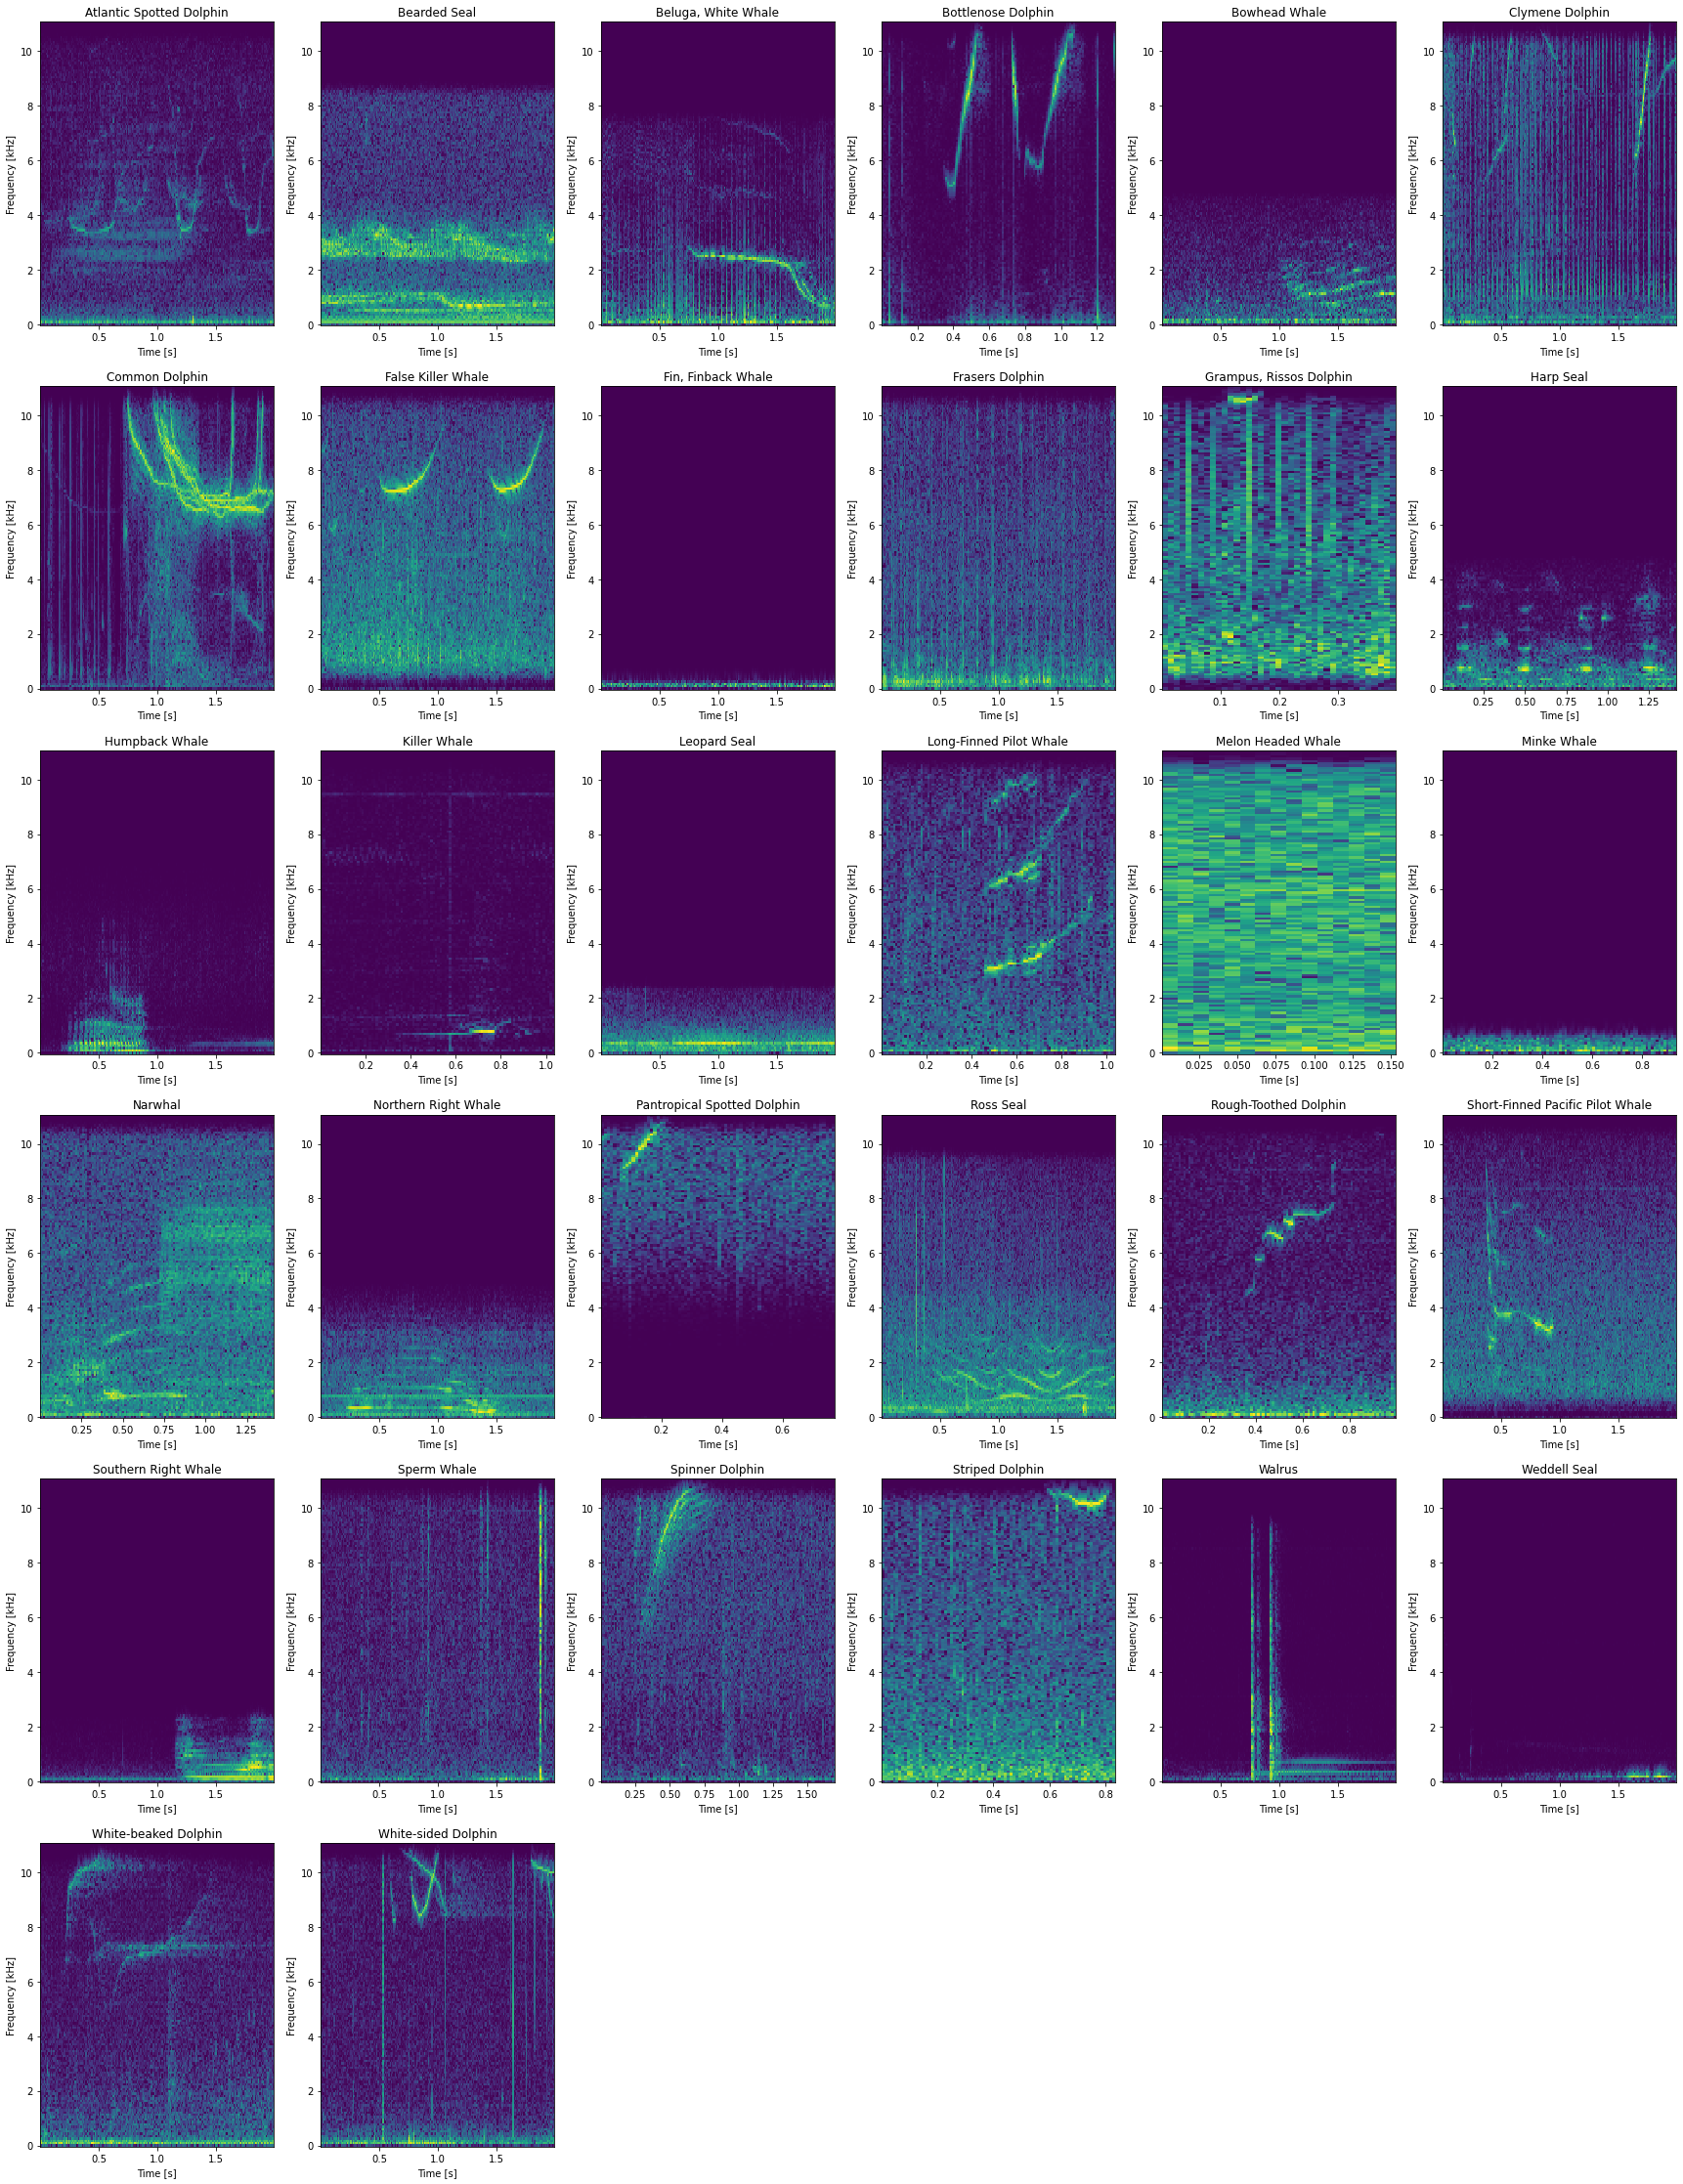

In [16]:
fig, axes = plt.subplots(6,6, figsize=(30,40))

for (species, data), ax in zip(anno.groupby('species'), axes.flat):
    y, sr = librosa.core.load(f'data/{data.path.iloc[0]}')
    freqs, times, Sx = signal.spectrogram(y[:2*sr], fs=sr) # visualizing just the first 2 seconds of audio
    ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx+1e-9), cmap='viridis', shading='auto')
    ax.set_ylabel('Frequency [kHz]')
    ax.set_xlabel('Time [s]');
    ax.set_title(' '.join(species.split('_'))) # nicer title formatting
    
for i in range(2,6):
    axes[-1][i].axis('off');

We can also listen to an example audio recording from each of the species.

In [19]:
import glob
from IPython.core.display import display, HTML

In [27]:
for audio_path in glob.glob('assets/*'):
    display(HTML(f'''
        {' '.join(audio_path.split('/')[1][:-4].split('_'))}
        <audio style="display: block"
        controls
        src="{audio_path}">
            Your browser does not support the
            <code>audio</code> element.
        </audio>
        ''')
    )

# CPP suitability analysis

It would be challenging to use this dataset in the standard formulation of the CPP problem. Within a species, we have no way of telling whether any two calls are coming from the same individual or not.

One creative way of leveraging this dataset would be to mix speakers across species. This wouldn't be the standard CPP problem formulation, but could lead to an interesting study nonetheless.

Additionally, if it would be deemed okay to run the CPP pipeline on calls where there is no guarantee that they are coming from two distinct individuals, this dataset could lend itself to creating a very rich dataset of synthetic mixtures across a high number of species. 